# **Magnetic Resonance Imaging Comparisons of Demented and Nondemented Adults**

**Motivation:**

Alzheimer's disease (AD) is the leading cause of dementia in older adults and therefore a major health concern. In its early stages, Alzheimer's disease is hard to predict, but treatment given at an early stage of AD is more effective and causes less minor damage than a treatment done at a later stage. For that reason, it is extremely important to provide early intervention and diagnose symptoms early and accurately. To help improve the diagnosis scientists turned to several machine learning techniques such as Decision Tree, Random Forest, Support Vector Machine, Gradient Boosting, and Voting classifiers to identify the best parameters for Alzheimer's disease prediction.

**Context about the dataset:**

The Open Access Series of Imaging Studies (OASIS) is a project aimed at making MRI data sets of the brain freely available to the scientific community. By compiling and freely distributing MRI data sets, we hope to facilitate future discoveries in basic and clinical neuroscience. OASIS is made available by the Washington University Alzheimer’s Disease Research Center, Dr. Randy Buckner at the Howard Hughes Medical Institute (HHMI)( at Harvard University, the Neuroinformatics Research Group (NRG) at Washington University School of Medicine, and the Biomedical Informatics Research Network (BIRN).

**Content of the dataset:**

Longitudinal MRI Data in Nondemented and Demented Older Adults: This set consists of a longitudinal collection of 150 subjects aged 60 to 98. Each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 72 of the subjects were characterized as nondemented throughout the study. 64 of the included subjects were characterized as demented at the time of their initial visits and remained so for subsequent scans, including 51 individuals with mild to moderate Alzheimer’s disease. Another 14 subjects were characterized as nondemented at the time of their initial visit and were subsequently characterized as demented at a later visit.

In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Each MRI has a unique MRI ID connecting it to the specific patient with a unique subject ID. Each MRI also specifies the following information:
* Group: Class
* Visit: Visit Order
* MR Delay: MR Delay Time (Contrast)
* M/F: Gender
* Hand: Dominant hand
* Age: Subject's age
* EDUC: Years of education
* SES: Socioeconomic Status
* MMSE: Mini Mental State Examination
* CDR: Clinical Dementia Rating
* eTIV: Estimated total intracranial volume
* nWBV: Normalize Whole Brain Volume
* ASF: Atlas Scaling Factor




The following table shows how the dataset is stored.


In [261]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/oasis_longitudinal.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


We're going to use function nunique() to help us identify monotonic features. We can observe that MRI ID is such a feature and can be removed.
We can also remove the feature hand, as it is the same for all subjects and therefore doesn't carry any useful information.

In [262]:
df.nunique()

Subject ID    150
MRI ID        373
Group           3
Visit           5
MR Delay      201
M/F             2
Hand            1
Age            39
EDUC           12
SES             5
MMSE           18
CDR             4
eTIV          286
nWBV          136
ASF           265
dtype: int64

In [263]:
df.drop(('MRI ID'), axis=1, inplace=True)

In [264]:
df.drop(('Hand'), axis=1, inplace=True)

The next table shows a number of non null values for each parameter. From the table, we can observe that some values are missing. To be more specific, we're missing two values in the MMSE column and 19 in SES column.

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   Group       373 non-null    object 
 2   Visit       373 non-null    int64  
 3   MR Delay    373 non-null    int64  
 4   M/F         373 non-null    object 
 5   Age         373 non-null    int64  
 6   EDUC        373 non-null    int64  
 7   SES         354 non-null    float64
 8   MMSE        371 non-null    float64
 9   CDR         373 non-null    float64
 10  eTIV        373 non-null    int64  
 11  nWBV        373 non-null    float64
 12  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(3)
memory usage: 38.0+ KB


Here is another way to find missing values. To fix this we could replace them with arithmetic middle, completely remove sets or parameters containing them, or look into other datasets to try and find the right values. Because of the already small size of the dataset, the missing values are going to be replaced with their median.

In [266]:
df.isna().sum()

Subject ID     0
Group          0
Visit          0
MR Delay       0
M/F            0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [267]:
df.loc[df.SES.isna(),'SES'] = df.loc[:,'SES'].median()
df.loc[df.MMSE.isna(),'MMSE'] = df.loc[:,'MMSE'].median()
df.isna().sum()

Subject ID    0
Group         0
Visit         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

To get more familiar with the dataset we'll start by showing some basic information, such as arithmetic middle, median, standard deviation, quartiles, and minimum and maximum value for each column.

In [268]:
df.describe()


,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.436997,27.351206,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.109307,3.675329,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


 The maximum values for MR Delay could be a potential outlier, but after taking a deeper look into it, we're going to keep them as they are.

In [269]:
print('MR Delay > 1000: ', (df['MR Delay'] > 1000).sum())
print('MR Delay > 1500: ', (df['MR Delay'] > 1500).sum())
print('MR Delay > 2000: ', (df['MR Delay'] > 2000).sum())

MR Delay > 1000:  87
MR Delay > 1500:  43
MR Delay > 2000:  13


Another potential outlier is MMSE, the lowest values. They should be kept in mind when further analyzing the data and if necessary even removed.

In [270]:
print('MMSE < 20: ', (df['MMSE'] < 20).sum())
print('MMSE < 15: ', (df['MMSE'] < 15).sum())
print('MMSE < 10: ', (df['MMSE'] < 10).sum())
print('MMSE < 5: ', (df['MMSE'] < 5).sum())

MMSE < 20:  17
MMSE < 15:  2
MMSE < 10:  2
MMSE < 5:  1


Next, we're going to check the consistency of nonnumerical data. Everything seems fine.

In [271]:
df.Group.unique()

array(['Nondemented', 'Demented', 'Converted'], dtype=object)

In [272]:
df['M/F'].unique()

array(['M', 'F'], dtype=object)

Next, we're going to graphically represent the given data using histograms.

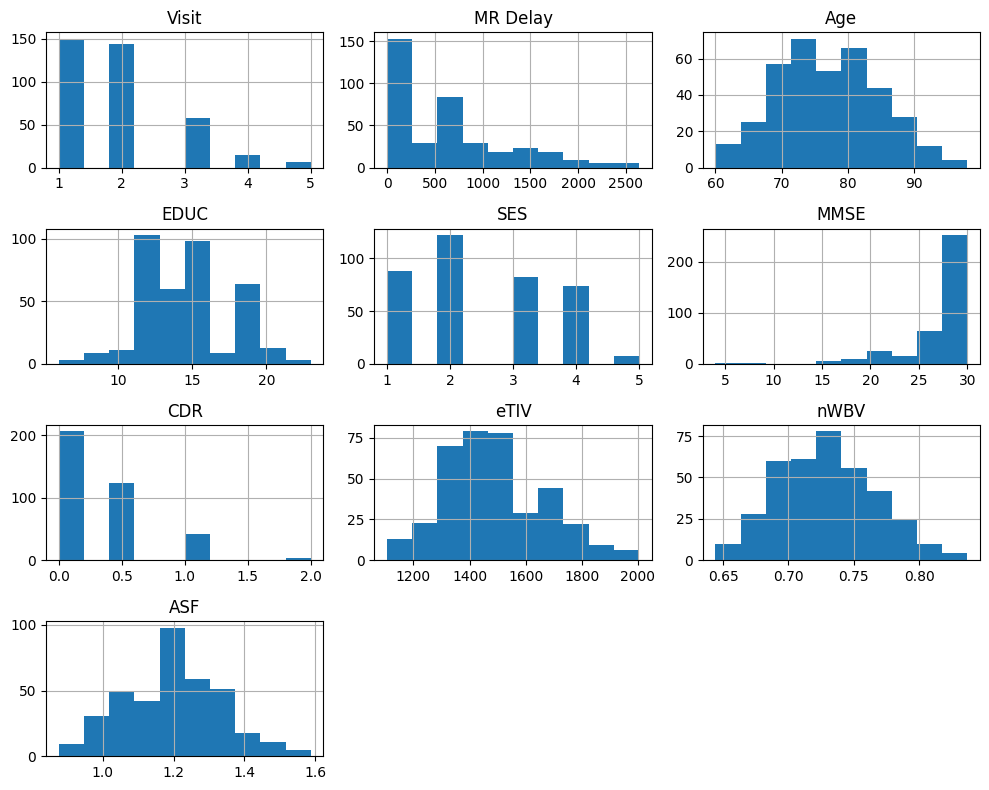

In [273]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

From the previous table and charts, we can gain insight into the dataset we're working with.

We can see that each subject made between one and five visits. Almost all of them went for two visits, a little more than a third visited three times, and only a small number of them had a fourth and fifth visit.

All subjects are between 60 and 98 years old, with the median at 77.

The years of education vary, but the majority falls in the group between 12 and 20 years.

On the MMSE we can spot some possible outliers with a very low value.



The dataset contains data of 62 men and 88 women.

In [274]:
df_unique_subjects = df.drop_duplicates('Subject ID')
gender_counts = df_unique_subjects['M/F'].value_counts()
gender_counts

F    88
M    62
Name: M/F, dtype: int64

From the following bar graph, we can observe that dementia was more common among the male subjects.

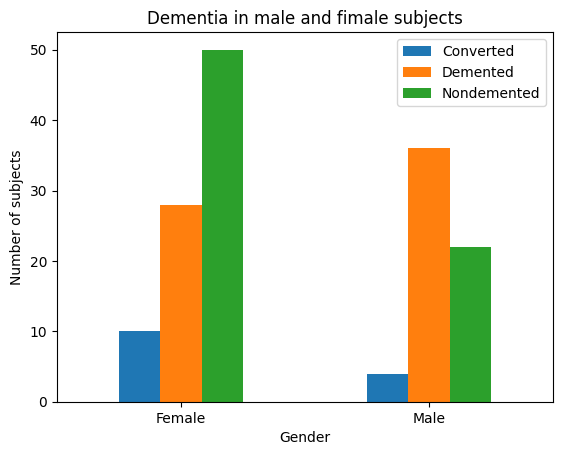

In [275]:
gender_cdr_counts = df_unique_subjects.groupby(['M/F', 'Group']).size().unstack(fill_value=0)
ax = gender_cdr_counts.plot(kind='bar', stacked=False)
ax.set_xticklabels(['Female', 'Male'], rotation=0)
plt.title('Dementia in male and fimale subjects')
plt.xlabel('Gender')
plt.ylabel('Number of subjects')
plt.legend()

The next line graph shows how the number of demented subjects changes across the different socioeconomic classes. We can se that 3rd 4th and 5th class have a greater percentage of people with dementia.

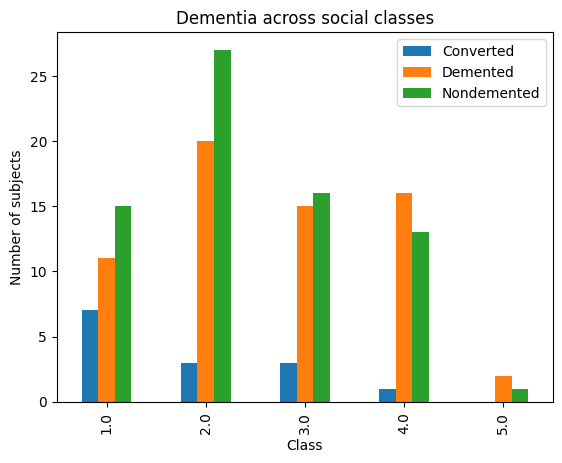

In [276]:
ses_counts = df_unique_subjects.groupby(['SES', 'Group']).size().unstack(fill_value=0)
ax = ses_counts.plot(kind='bar')
plt.title('Dementia across social classes')
plt.xlabel('Class')
plt.ylabel('Number of subjects')
plt.legend()

The following graph shows how many years of education subjects had to see if it can be connected to having dementia. We can observe that dementia is, by percentage, more common among subjects with less years spent in education.

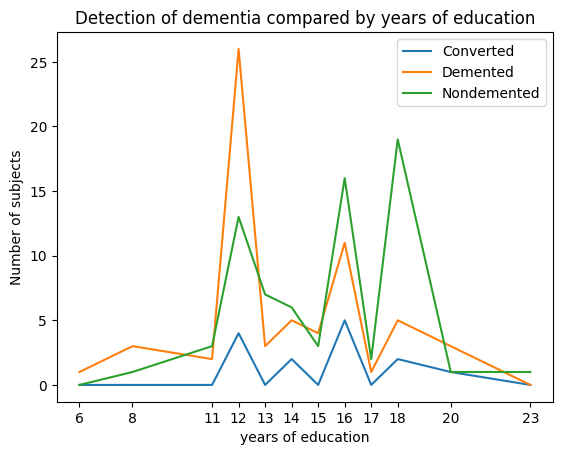

In [277]:
ses_counts = df_unique_subjects.groupby(['EDUC', 'Group']).size().unstack(fill_value=0)
ax = ses_counts.plot(kind='line')
ax.set_xticks(ses_counts.index)
ax.set_xticklabels([int(x) for x in ses_counts.index])
plt.title('Detection of dementia compared by years of education')
plt.xlabel('years of education')
plt.ylabel('Number of subjects')
plt.legend()

Correlation matrix of the given data.
ASF and eTIV are so highly correlated that we probably don't have to use both of them when we're training models. We can probably exclude some other features as well.

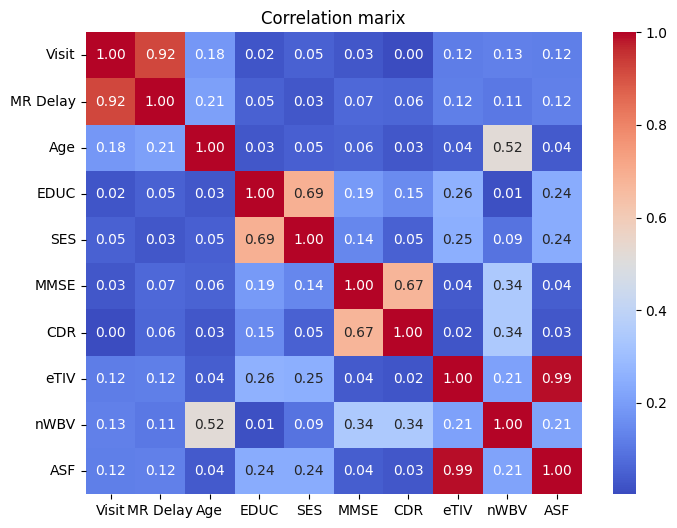

In [278]:
df_num = df.select_dtypes(exclude="object")
fig = plt.figure(figsize=(8,6))
corr = df_num.corr(method='pearson').abs()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation marix')
plt.show()

Scatter plots based on age and whole brain volume, age and year of education, years of education, and socioeconomic status.

The problem with this type of diagram is that there were multiple subjects with the same number of years of education and socioeconomic status, so they are shown one over the other. Better way to vizualise those and similar features would be using box plot, like the next example for age, or graphs with socioeconomic status, and years of education which were shown before.

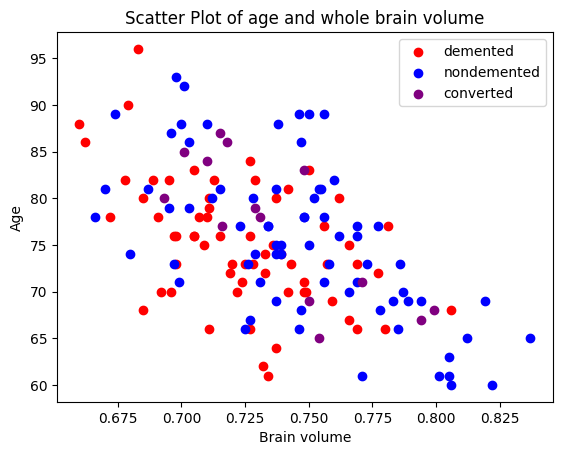

In [279]:
demented = df_unique_subjects[df_unique_subjects['Group'] == 'Demented']
nondemented = df_unique_subjects[df_unique_subjects['Group'] == 'Nondemented']
converted = df_unique_subjects[df_unique_subjects['Group'] == 'Converted']

plt.scatter(demented['nWBV'], demented['Age'], color='red', label='demented')
plt.scatter(nondemented['nWBV'], nondemented['Age'], color='blue', label='nondemented')
plt.scatter(converted['nWBV'], converted['Age'], color='purple', label='converted')

plt.title('Scatter Plot of age and whole brain volume')
plt.ylabel('Age')
plt.xlabel('Brain volume')
plt.legend()
plt.show()

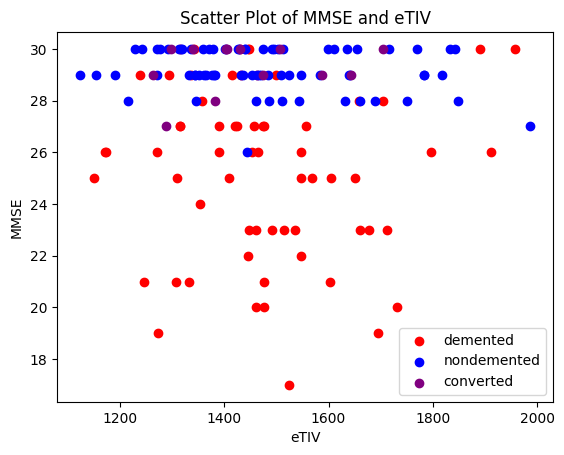

In [280]:
plt.scatter(demented['eTIV'], demented['MMSE'], color='red', label='demented')
plt.scatter(nondemented['eTIV'], nondemented['MMSE'], color='blue', label='nondemented')
plt.scatter(converted['eTIV'], converted['MMSE'], color='purple', label='converted')

plt.title('Scatter Plot of MMSE and eTIV')
plt.ylabel('MMSE')
plt.xlabel('eTIV')
plt.legend()
plt.show()

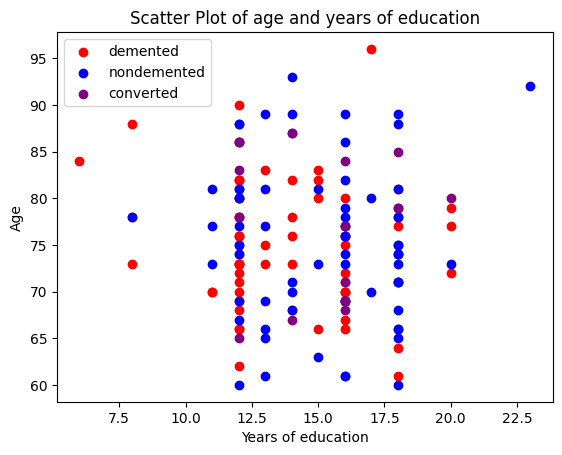

In [281]:
plt.scatter(demented['EDUC'], demented['Age'], color='red', label='demented')
plt.scatter(nondemented['EDUC'], nondemented['Age'], color='blue', label='nondemented')
plt.scatter(converted['EDUC'], converted['Age'], color='purple', label='converted')

plt.title('Scatter Plot of age and years of education')
plt.ylabel('Age')
plt.xlabel('Years of education')
plt.legend()
plt.show()

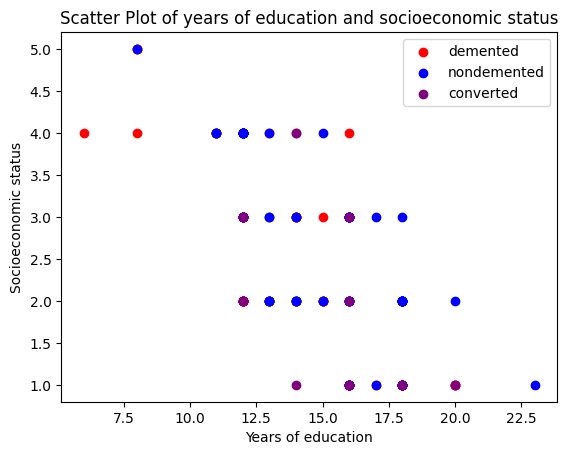

In [282]:
plt.scatter(demented['EDUC'], demented['SES'], color='red', label='demented')
plt.scatter(nondemented['EDUC'], nondemented['SES'], color='blue', label='nondemented')
plt.scatter(converted['EDUC'], converted['SES'], color='purple', label='converted')

plt.title('Scatter Plot of years of education and socioeconomic status')
plt.ylabel('Socioeconomic status')
plt.xlabel('Years of education')
plt.legend()
plt.show()

The next graph is a box plot comparison of subjects with and without dementia.

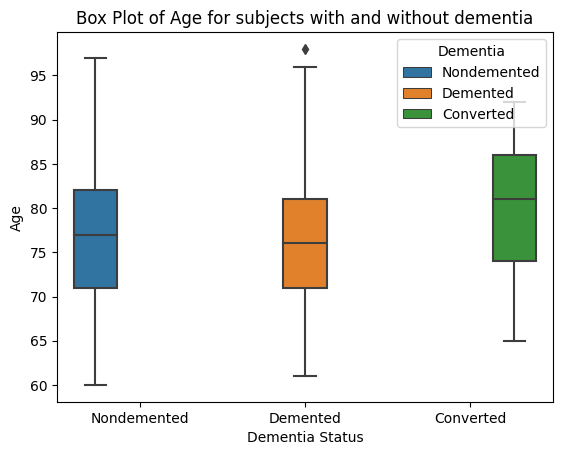

In [283]:
sns.boxplot(x='Group', y='Age', data=df, hue='Group')
plt.title('Box Plot of Age for subjects with and without dementia')
plt.xlabel('Dementia Status')
plt.ylabel('Age')
plt.legend(title='Dementia', loc='upper right')
plt.show()

# **Replicating results**

As in the article, we're only going to use data from the first visit.

In [284]:
data = df[df['Visit'] == 1]

Run the following code when you want to remove 'Converted' group from the 'Group' variable.

In [285]:
data = data[data['Group'] != 'Converted']
unique_values_count = data['Group'].nunique()
print(f"The number of unique values in 'Group' is: {unique_values_count}")

The number of unique values in 'Group' is: 2


We're going to use LabelEncoder to transform categorical variables (gender, group) into numerical ones.

In [286]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['M/F']= label_encoder.fit_transform(data['M/F'])
data['Group']= label_encoder.fit_transform(data['Group'])
data['Group'].unique()
data.head()

,Subject ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,1,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
2,OAS2_0002,0,1,0,1,75,12,2.0,23.0,0.5,1678,0.736,1.046
5,OAS2_0004,1,1,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
7,OAS2_0005,1,1,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
10,OAS2_0007,0,1,0,1,71,16,2.0,28.0,0.5,1357,0.748,1.293


Standardize the data

In [287]:
data = data.drop(['Visit'],axis=1).drop(['MR Delay'],axis=1).drop(['Subject ID'], axis=1).drop(['CDR'], axis=1)

columns_to_standardize = [
    "Age",
    "EDUC",
    "SES",
    "MMSE",
    "eTIV",
    "nWBV",
    "ASF"
]

for col in columns_to_standardize:
    data[col] = (data[col] - data[col].mean()) / data[col].std()

data.head()


,Group,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,1,1,1.554615,-0.161949,-0.483460,-0.123145,2.852270,-1.081153,-2.282350
2,0,1,-0.037061,-0.850232,-0.483460,-1.436695,1.120235,0.002790,-1.123240
5,1,0,1.687255,1.214617,0.429742,0.205242,-1.475017,-0.701773,1.706978
7,1,1,0.626137,-0.850232,1.342945,0.205242,1.181893,-0.647576,-1.173018
10,0,1,-0.567620,0.526334,-0.483460,0.205242,-0.679065,0.327972,0.633202


Separating variables and labels and randomly dividing them in train and test set (80:20 ratio). As a part of feature selection we're going to remove visit (as we're only looking at first visits) and MR delay, as they did in the article.

In [288]:
X = data.drop(['Group'],axis=1)
Y = data['Group']



In [289]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=41)
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

108
108
28
28


In [290]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

We're going to use grid search and 5-fold cross validation to determine the best hyperparameters. We'll display the best hyperparameters and then use them to train the model and then test it's accuracy on the test set.

Decision Tree (DT):

In [291]:
dt_model = DecisionTreeClassifier(random_state=42)
cv_scores = cross_val_score(dt_model, X_train, Y_train, cv=10, scoring='accuracy')
print(f"Mean Cross-Validated Accuracy (10 folds): {cv_scores.mean()}")

dt_model.fit(X_train, Y_train)
accuracy = dt_model.score(X_test, Y_test)
print(f"Decision Tree Accuracy: {accuracy}")

Mean Cross-Validated Accuracy (10 folds): 0.7781818181818182
Decision Tree Accuracy: 0.8571428571428571


In [292]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dt, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validated Accuracy: {best_score}")

best_dt_model = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_model.fit(X_train, Y_train)

test_accuracy = best_dt_model.score(X_test, Y_test)
print(f"Decision Tree Test Accuracy with Best Hyperparameters: {test_accuracy}")


Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validated Accuracy: 0.8063636363636363
Decision Tree Test Accuracy with Best Hyperparameters: 0.8571428571428571


Random Forest (RF):

In [293]:
rf_model = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(rf_model, X_train, Y_train, cv=10, scoring='accuracy')
print(f"Mean Cross-Validated Accuracy (10 folds): {cv_scores.mean()}")

rf_model.fit(X_train, Y_train)
accuracy = rf_model.score(X_test, Y_test)
print(f"Random Forest Accuracy: {accuracy}")

Mean Cross-Validated Accuracy (10 folds): 0.8254545454545456
Random Forest Accuracy: 0.8928571428571429


Support Vector Machine (SVM):

In [294]:
svm_model = SVC(kernel='linear', probability=True, random_state=42)
cv_scores = cross_val_score(svm_model, X_train, Y_train, cv=10)
print(f"Mean Cross-Validated Accuracy (10 folds): {cv_scores.mean()}")

svm_model.fit(X_train, Y_train)
accuracy = svm_model.score(X_test, Y_test)
print(f"SVM Accuracy: {accuracy}")

Mean Cross-Validated Accuracy (10 folds): 0.8063636363636363
SVM Accuracy: 0.8571428571428571


In [295]:
"""
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_model = SVC()

grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=10, scoring='accuracy')
grid_search_svm.fit(X_train, Y_train)

best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print("Best Hyperparameters for SVM:", best_params_svm)
print("Best Cross-Validated Accuracy for SVM:", best_score_svm)

final_svm_model = SVC(**best_params_svm)
final_svm_model.fit(X_train, Y_train)

test_accuracy_svm = final_svm_model.score(X_test, Y_test)
print(f"SVM Test Accuracy with Best Hyperparameters: {test_accuracy_svm}")
"""

'\nparam_grid_svm = {\n    \'C\': [0.1, 1, 10],\n    \'kernel\': [\'linear\', \'poly\', \'rbf\'],\n    \'gamma\': [\'scale\', \'auto\']\n}\n\nsvm_model = SVC()\n\ngrid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=10, scoring=\'accuracy\')\ngrid_search_svm.fit(X_train, Y_train)\n\nbest_params_svm = grid_search_svm.best_params_\nbest_score_svm = grid_search_svm.best_score_\n\nprint("Best Hyperparameters for SVM:", best_params_svm)\nprint("Best Cross-Validated Accuracy for SVM:", best_score_svm)\n\nfinal_svm_model = SVC(**best_params_svm)\nfinal_svm_model.fit(X_train, Y_train)\n\ntest_accuracy_svm = final_svm_model.score(X_test, Y_test)\nprint(f"SVM Test Accuracy with Best Hyperparameters: {test_accuracy_svm}")\n'

XGBoost:

In [296]:
xgb_model = XGBClassifier(random_state=42)
cv_scores = cross_val_score(xgb_model, X_train, Y_train, cv=10)
print(f"Mean Cross-Validated Accuracy (10 folds): {cv_scores.mean()}")

xgb_model.fit(X_train, Y_train)
accuracy = xgb_model.score(X_test, Y_test)
print(f"XGBoost Accuracy: {accuracy}")

Mean Cross-Validated Accuracy (10 folds): 0.8727272727272727
XGBoost Accuracy: 0.7857142857142857


Voting:

In [297]:
voting_model = VotingClassifier(estimators=[('dt_model', dt_model), ('rf_model', rf_model), ('svm_model', svm_model), ('xgb_model', xgb_model)], voting='soft')
cv_scores = cross_val_score(voting_model, X_train, Y_train, cv=10)
print(f"Mean Cross-Validated Accuracy (10 folds): {cv_scores.mean()}")

voting_model.fit(X_train, Y_train)
accuracy = voting_model.score(X_test, Y_test)
print(f"Voting Classifier Accuracy: {accuracy}")

Mean Cross-Validated Accuracy (10 folds): 0.8254545454545456
Voting Classifier Accuracy: 0.8571428571428571


Calculating accuracy, precision, recall, and F1 score for all 5 models.

In [298]:
from sklearn.metrics import classification_report

models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'SVM': svm_model,
    'XGBoost': xgb_model,
    'Voting Classifier': voting_model
}

performance_metrics = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test)

    report = classification_report(Y_test, y_pred, output_dict=True)

    performance_metrics[model_name] = {
        'Accuracy': report['accuracy'],
        'Precision': report['macro avg']['precision'],
        'Recall': report['macro avg']['recall'],
        'F1 Score': report['macro avg']['f1-score']
    }

metrics_df = pd.DataFrame.from_dict(performance_metrics, orient='index')
print(metrics_df)

                   Accuracy  Precision    Recall  F1 Score
Decision Tree      0.857143   0.854167  0.854167  0.854167
Random Forest      0.892857   0.921053  0.875000  0.885714
SVM                0.857143   0.900000  0.833333  0.844444
XGBoost            0.785714   0.781250  0.781250  0.781250
Voting Classifier  0.857143   0.866667  0.843750  0.850267


<ipython-input-299-0083a1ac17ad>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(metrics_df.index, rotation=45)


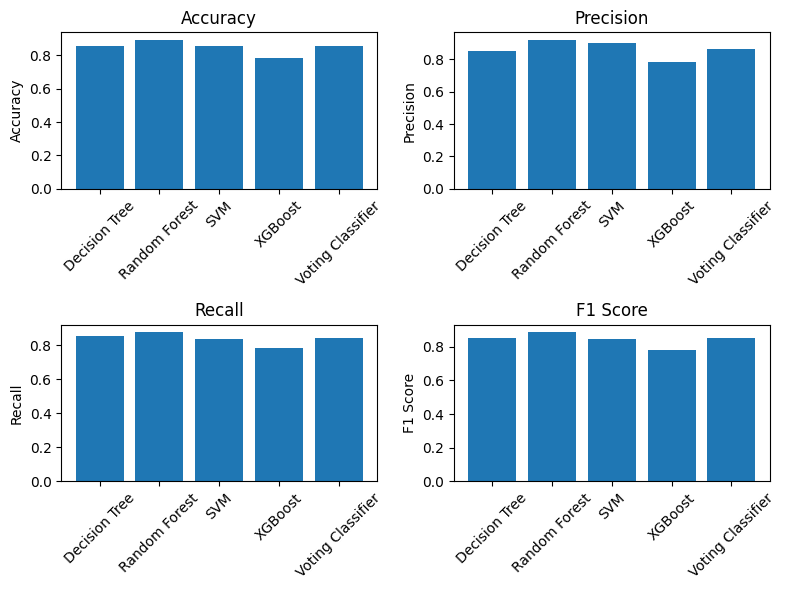

In [299]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

axs[0, 0].bar(metrics_df.index, metrics_df['Accuracy'])
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylabel('Accuracy')

axs[0, 1].bar(metrics_df.index, metrics_df['Precision'])
axs[0, 1].set_title('Precision')
axs[0, 1].set_ylabel('Precision')

axs[1, 0].bar(metrics_df.index, metrics_df['Recall'])
axs[1, 0].set_title('Recall')
axs[1, 0].set_ylabel('Recall')

axs[1, 1].bar(metrics_df.index, metrics_df['F1 Score'])
axs[1, 1].set_title('F1 Score')
axs[1, 1].set_ylabel('F1 Score')

for ax in axs.flat:
    ax.set_xticklabels(metrics_df.index, rotation=45)

plt.tight_layout()
plt.show()

Next, we're going to generate confusion matrixes.

In [300]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

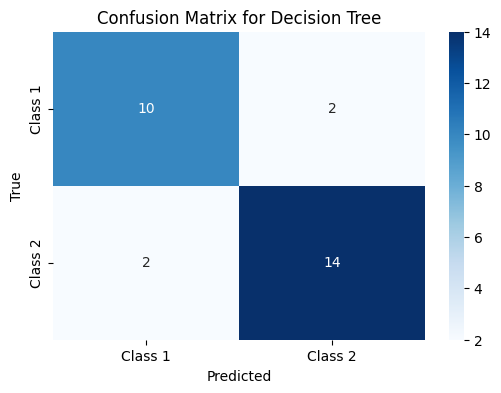

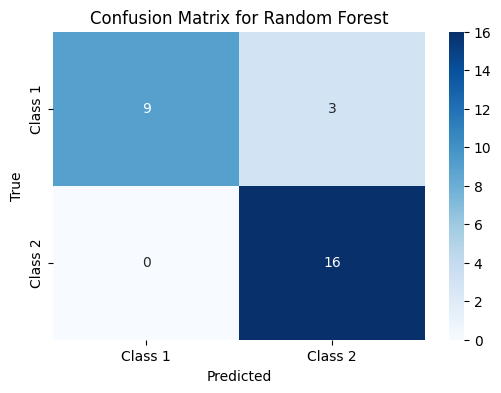

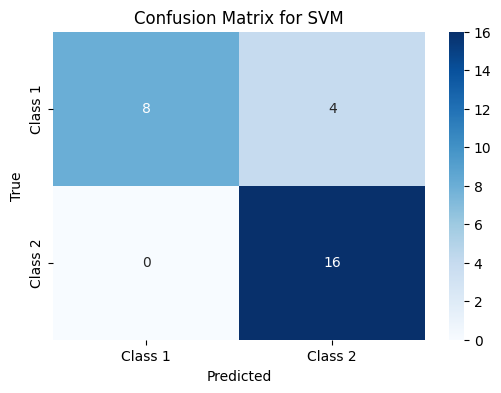

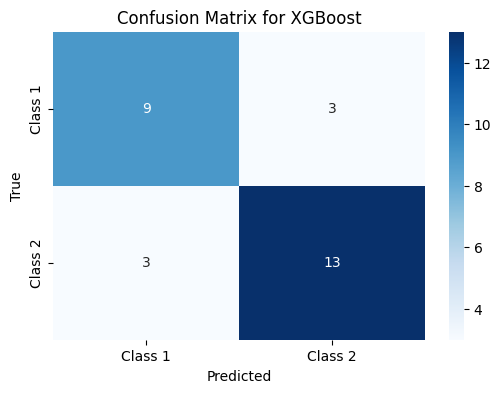

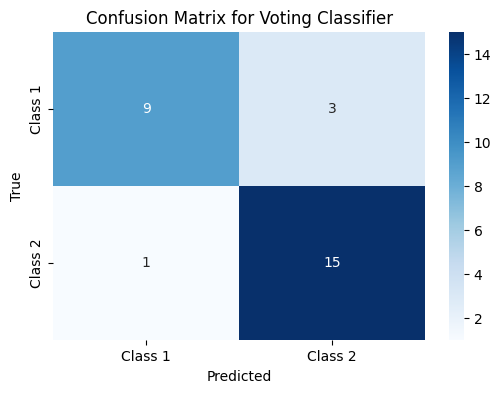

In [301]:
for model_name, model in models.items():
    y_pred = model.predict(X_test)

    cm = confusion_matrix(Y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[ 'Class 1', 'Class 2'],
                yticklabels=['Class 1', 'Class 2'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

We'll show AUC/ROC curves for our data.

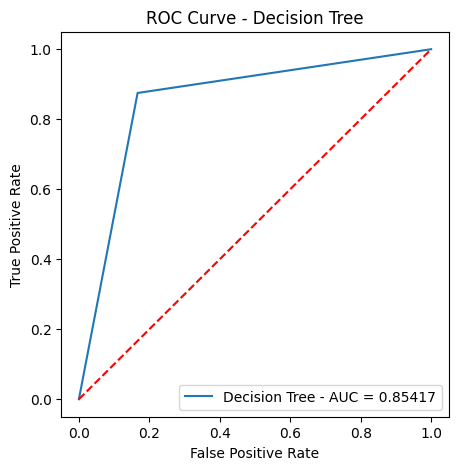

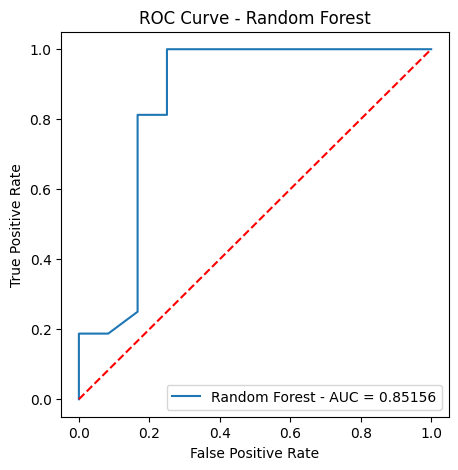

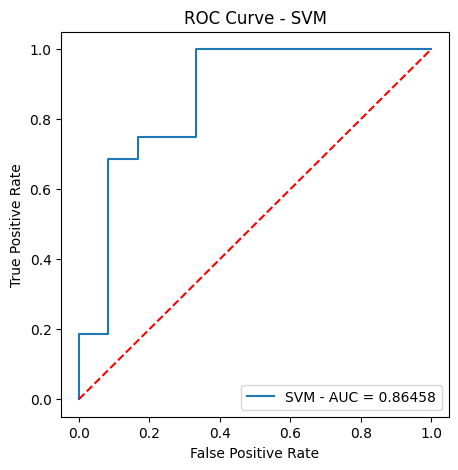

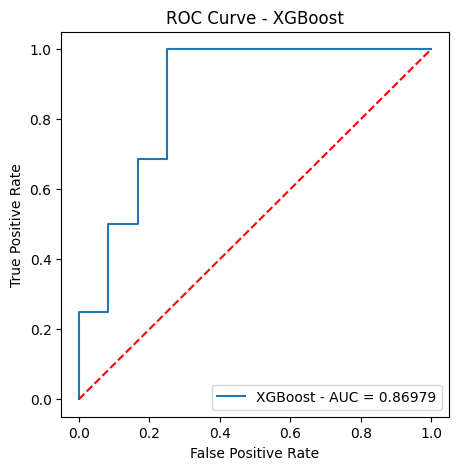

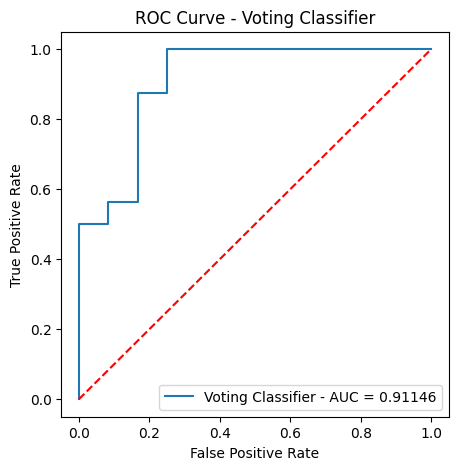

In [302]:
from sklearn.metrics import roc_curve, auc

for name, model in models.items():
    plt.figure(figsize=(5, 5))

    model.fit(X_train, Y_train)
    prob_pos = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(Y_test, prob_pos)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} - AUC = {roc_auc:.5f}')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')

    plt.show()